In [2]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

# VIF

- read Data

In [28]:
features = pd.read_csv('features_vif.csv')
features

,cust_id,여름-구매비율,상시행사상품구매율,재구매의사,요일_변동계수,저가상품구매율,가공식품 구매건수,베스트셀러구매비율,구매주기 규칙성,패션_대비_남성상품_거래율,...,명품구매비율,목적지향적 물품 소비율,시즌 마감 방문비율,가을/겨울의류구매비율,남성 캐주얼 구매건수,요일별_구매추세,유아동구매비율,주방용품구매비율,구매지점다양성,스타킹구매건수
0,0,0.980639,1.398817,-0.102773,-0.750104,0.467106,-0.195477,0.065853,0.610460,0.627820,...,-0.467531,-0.480795,0.149880,-0.470629,-0.531880,1.446069,-0.406455,-0.519049,1.212808,-0.357530
1,1,-1.213870,-0.793652,1.794431,0.735720,0.062687,-1.022422,-1.669261,-1.312999,1.712075,...,-0.467531,-0.480795,1.114508,-0.470629,-0.531880,-0.199227,-0.406455,-0.519049,-0.736291,-0.357530
2,2,-1.213870,-0.793652,1.794431,0.602534,0.739472,-1.022422,-1.669261,-1.312999,-0.900473,...,-0.467531,-0.480795,-1.361003,-0.470629,1.927723,-0.371213,-0.406455,-0.519049,-0.736291,-0.357530
3,3,-0.048308,-0.793652,-0.671383,-1.478134,0.739472,0.826864,0.181715,0.496546,-0.900473,...,-0.467531,-0.480795,0.369195,-0.470629,-0.531880,-0.332082,2.607439,-0.519049,-0.736291,2.796964
4,4,-1.213870,-0.793652,1.794431,0.735720,-1.430688,-1.022422,-0.571255,-1.312999,-0.900473,...,-0.467531,2.303990,-0.160964,-0.470629,-0.531880,-0.264843,-0.406455,-0.519049,-0.736291,-0.357530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.581798,-0.793652,0.786732,0.009244,-1.430688,-1.022422,-1.212349,1.259308,1.627544,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.531880,0.487980,2.633891,-0.519049,1.212808,-0.357530
5978,5978,-1.213870,-0.793652,-1.494333,1.420530,-1.430688,-1.022422,-1.669261,-1.312999,-0.900473,...,-0.467531,-0.480795,0.587044,-0.470629,-0.531880,-0.199227,-0.406455,-0.519049,-0.736291,-0.357530
5979,5979,0.306280,-0.793652,-0.210989,1.228116,-1.089975,-0.195477,-1.580884,0.416539,0.932046,...,1.507701,2.303990,1.041330,-0.470629,1.945910,2.194537,-0.406455,2.154823,-0.736291,-0.357530
5980,5980,-0.004617,-0.793652,0.939389,0.121465,-1.430688,-1.022422,0.629025,0.537149,-0.900473,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.531880,-0.064367,-0.406455,-0.519049,-0.736291,-0.357530


- EDA

In [29]:
#matplotlib 한글깨짐 지원

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)

In [30]:
# 결측값 파악
klib.missingval_plot(features)

No missing values found in the dataset.


In [31]:
len(features.columns)

45

Note: The number of non binary numerical features is very large (43), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


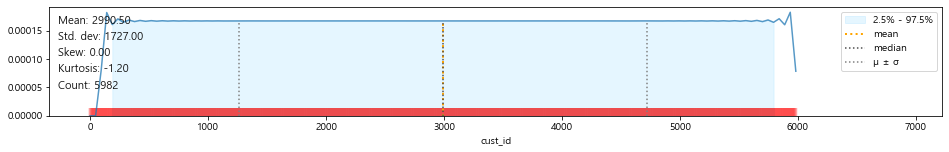

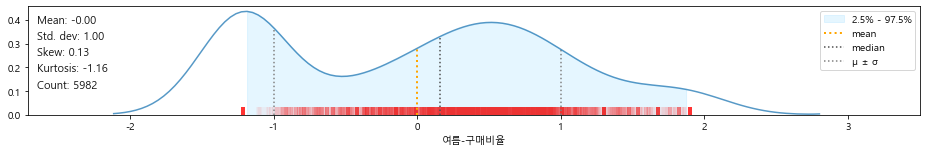

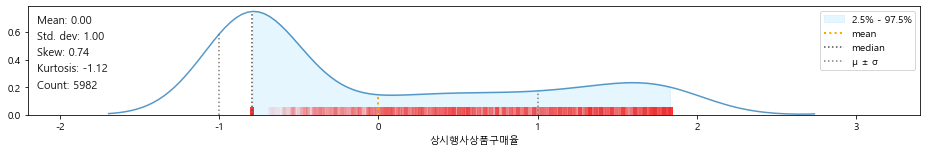

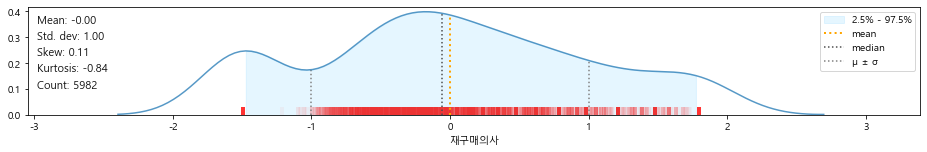

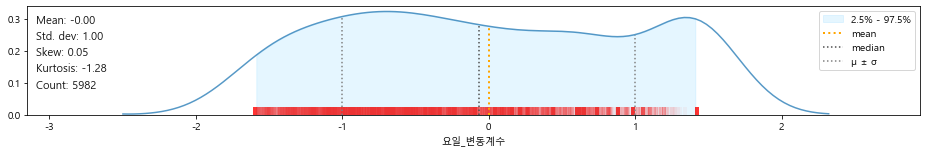

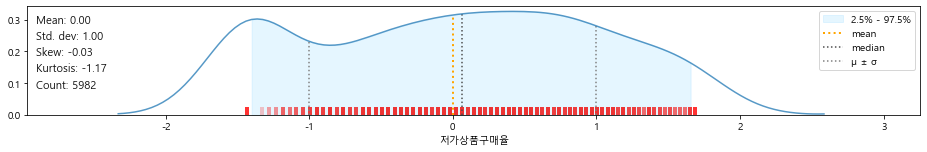

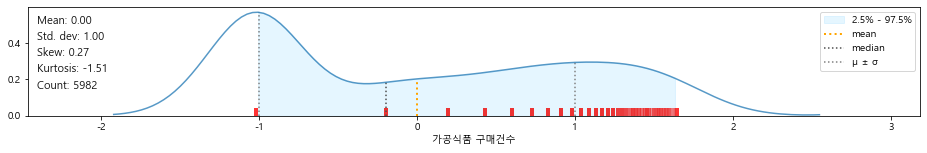

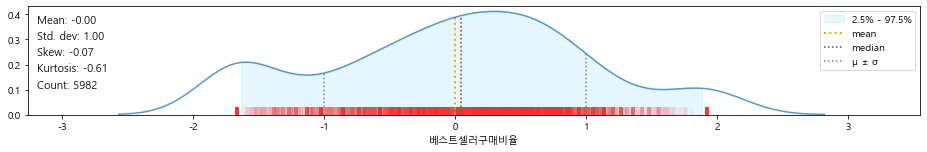

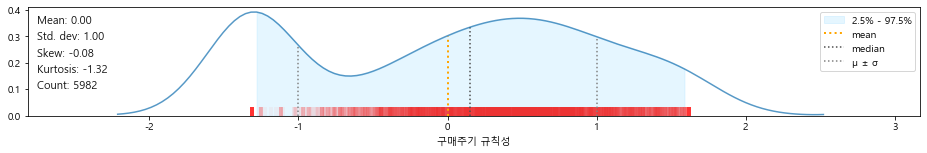

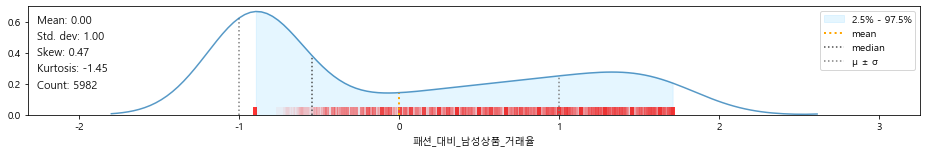

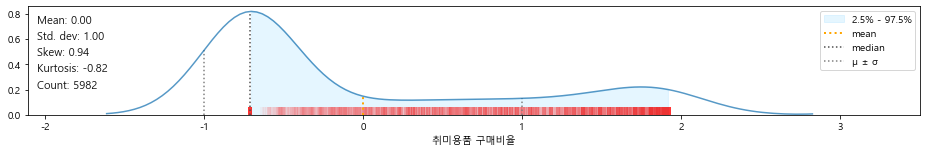

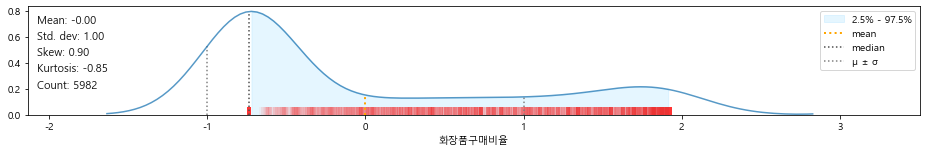

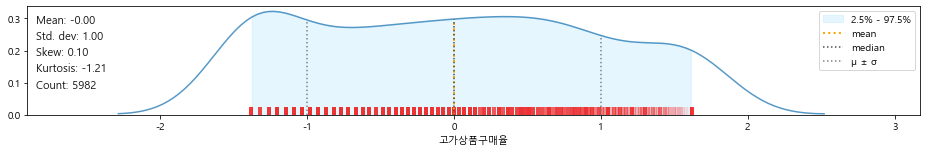

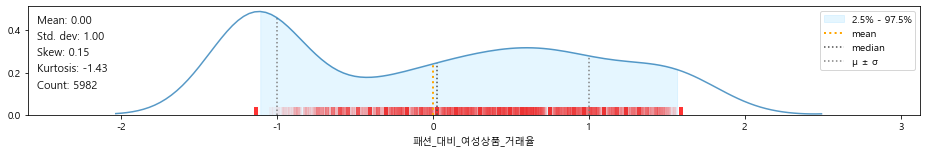

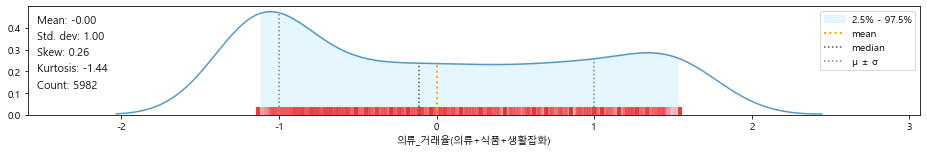

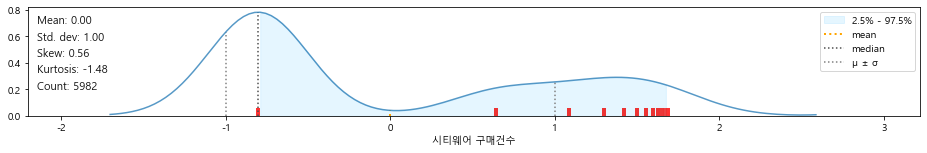

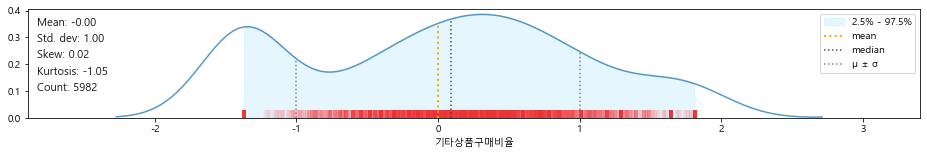

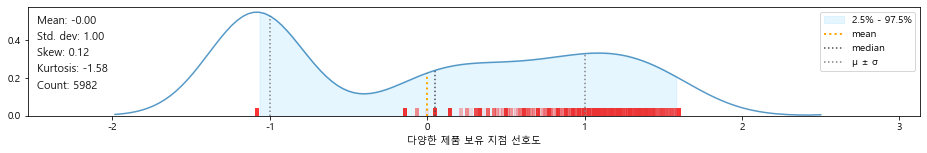

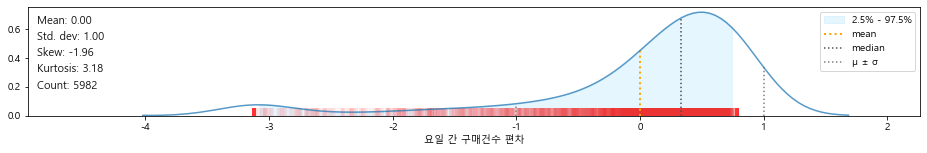

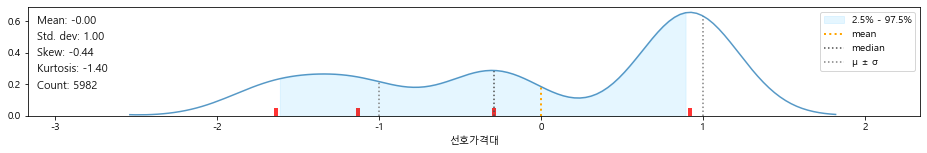

In [32]:
# 수치형 속성 파악

klib.dist_plot(features)

Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to further limit the results.


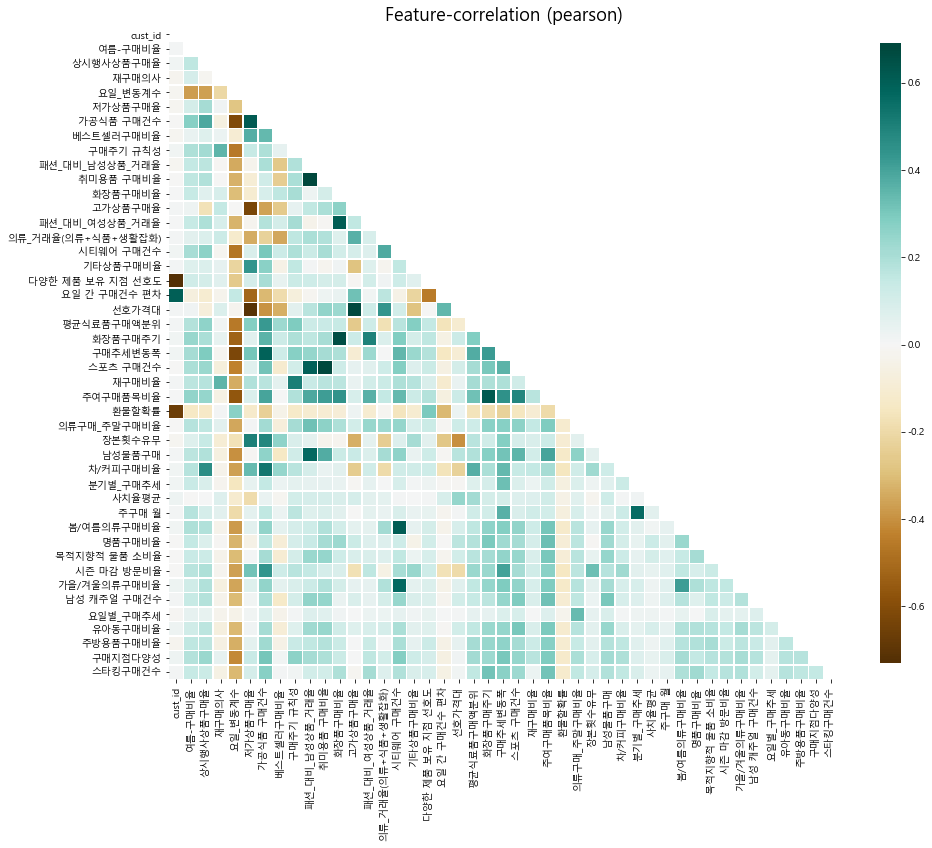

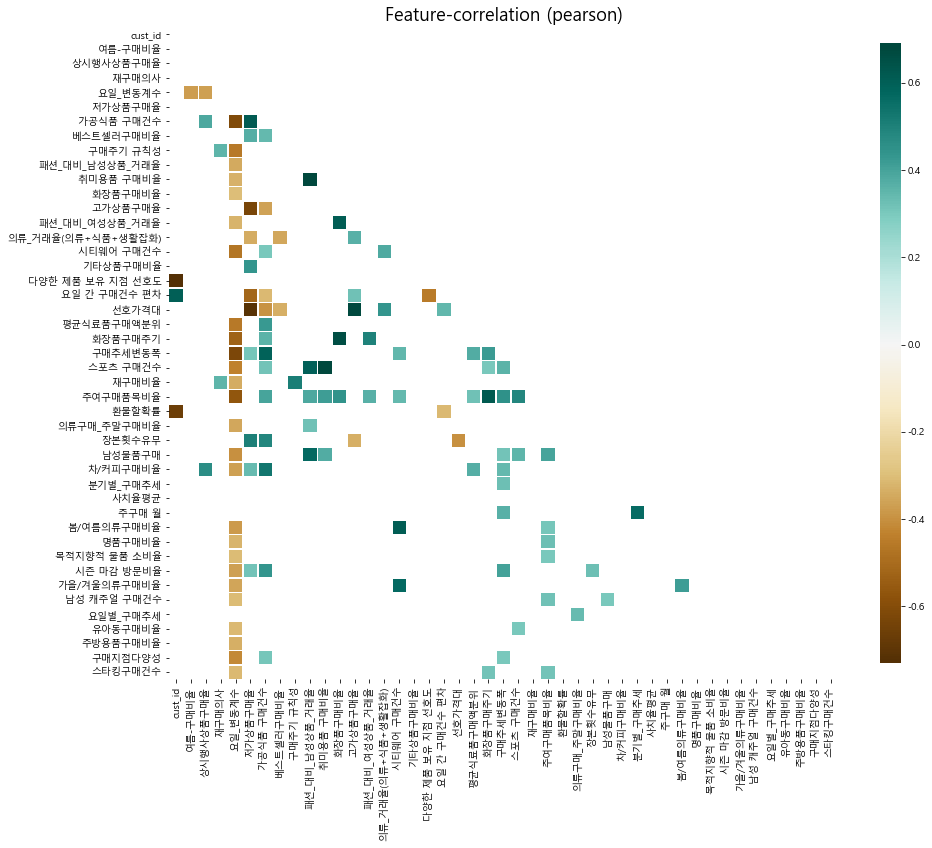

In [33]:
# 속성간 유사성 파악

klib.corr_plot(features, annot=False, figsize=(15,12))
klib.corr_plot(features, split='high', annot=False, figsize=(15,12))

- Scaling

In [34]:
# 역시 추가적인 scaling이 필요한 feature를 선택해 scaling한다.
# standardization 

features[['여름-구매비율','상시행사상품구매율','재구매의사','요일_변동계수','저가상품구매율','가공식품 구매건수','베스트셀러구매비율','구매주기 규칙성','패션_대비_남성상품_거래율','취미용품 구매비율','화장품구매비율','고가상품구매율','패션_대비_여성상품_거래율','의류_거래율(의류+식품+생활잡화)','시티웨어 구매건수','기타상품구매비율','다양한 제품 보유 지점 선호도','요일 간 구매건수 편차','선호가격대','평균식료품구매액분위']] = StandardScaler().fit_transform(features[['여름-구매비율','상시행사상품구매율','재구매의사','요일_변동계수','저가상품구매율','가공식품 구매건수','베스트셀러구매비율','구매주기 규칙성','패션_대비_남성상품_거래율','취미용품 구매비율','화장품구매비율','고가상품구매율','패션_대비_여성상품_거래율','의류_거래율(의류+식품+생활잡화)','시티웨어 구매건수','기타상품구매비율','다양한 제품 보유 지점 선호도','요일 간 구매건수 편차','선호가격대','평균식료품구매액분위']])

# MinMaxScaler
features[['여름-구매비율','상시행사상품구매율','재구매의사','요일_변동계수','저가상품구매율','가공식품 구매건수','베스트셀러구매비율','구매주기 규칙성','패션_대비_남성상품_거래율','취미용품 구매비율','화장품구매비율','고가상품구매율','패션_대비_여성상품_거래율','의류_거래율(의류+식품+생활잡화)','시티웨어 구매건수','기타상품구매비율','다양한 제품 보유 지점 선호도','요일 간 구매건수 편차','선호가격대','평균식료품구매액분위']] = MinMaxScaler().fit_transform(features[['여름-구매비율','상시행사상품구매율','재구매의사','요일_변동계수','저가상품구매율','가공식품 구매건수','베스트셀러구매비율','구매주기 규칙성','패션_대비_남성상품_거래율','취미용품 구매비율','화장품구매비율','고가상품구매율','패션_대비_여성상품_거래율','의류_거래율(의류+식품+생활잡화)','시티웨어 구매건수','기타상품구매비율','다양한 제품 보유 지점 선호도','요일 간 구매건수 편차','선호가격대','평균식료품구매액분위']] )

Note: The number of non binary numerical features is very large (43), please consider splitting the data. Showing plots for the first 20 numerical features. Override this by setting showall=True.


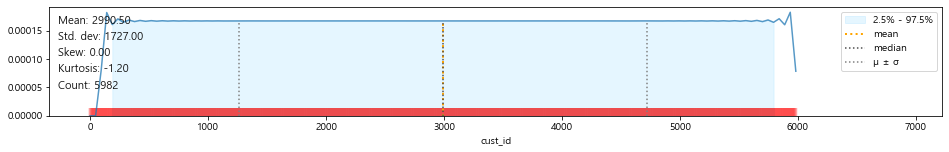

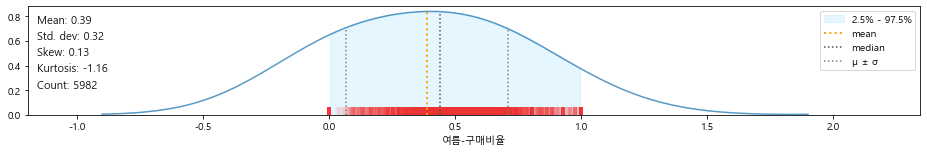

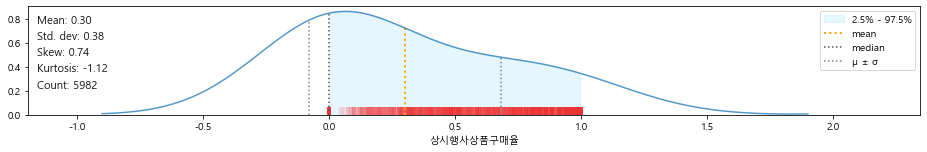

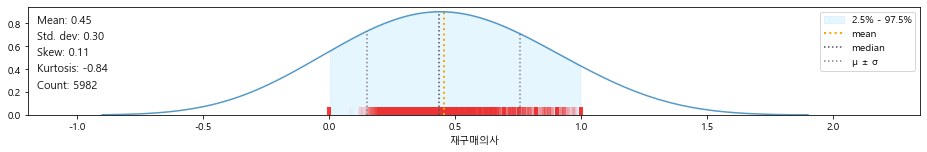

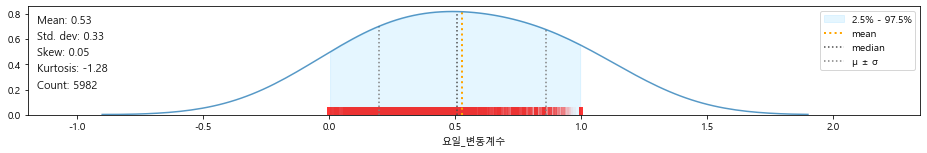

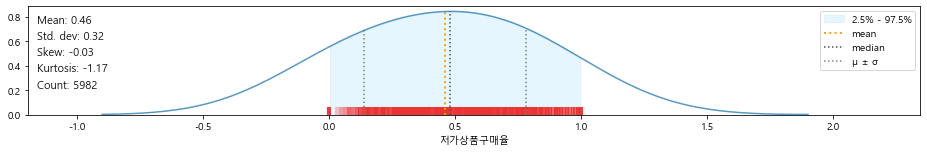

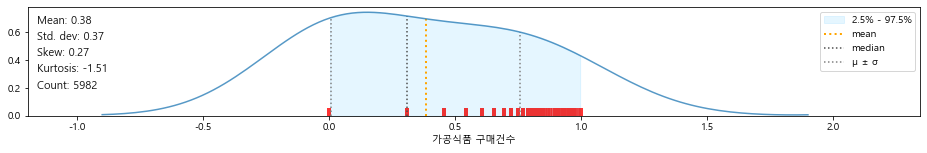

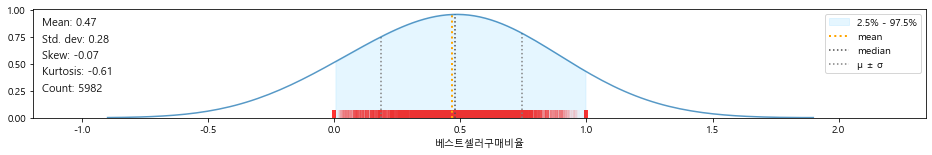

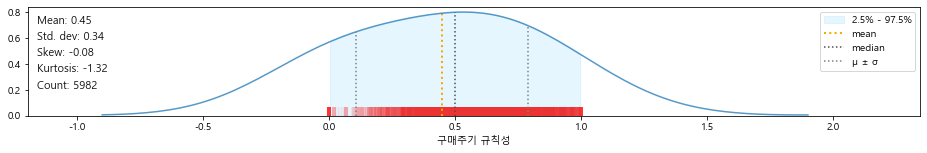

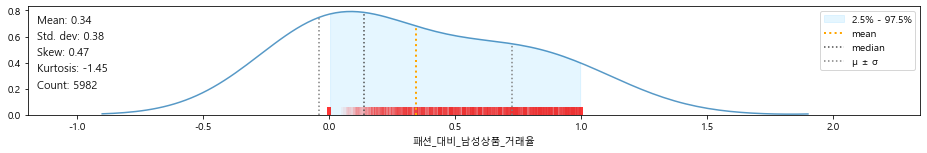

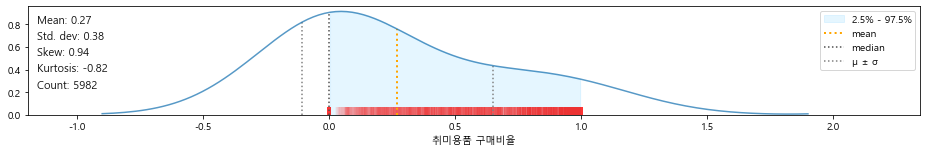

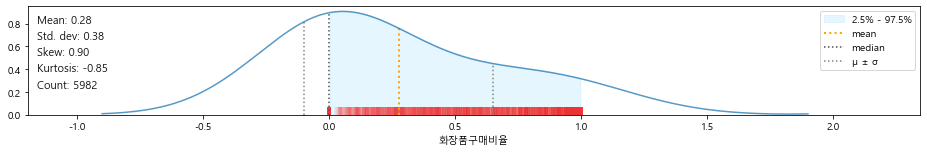

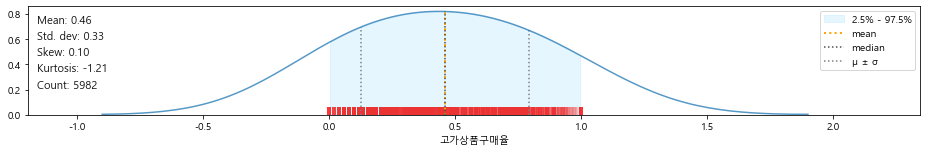

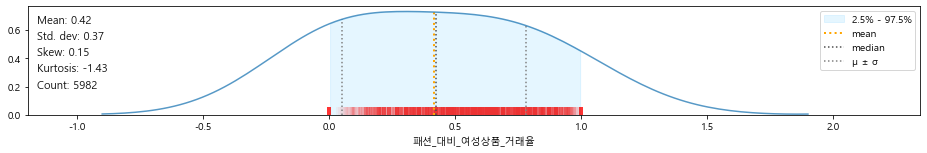

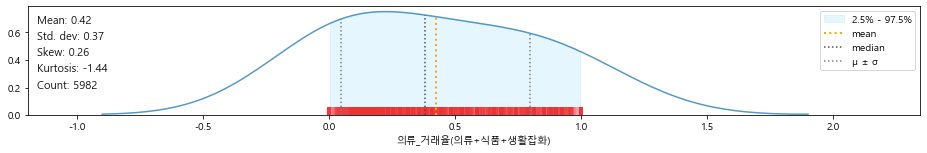

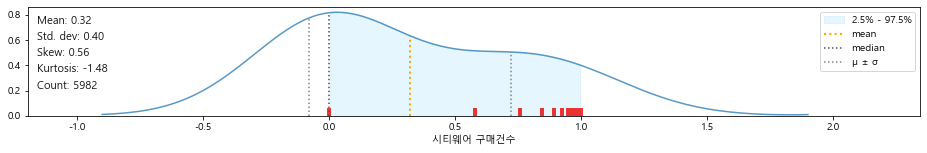

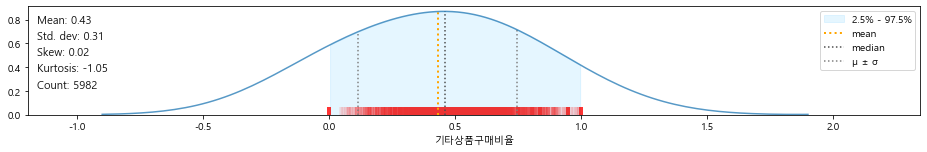

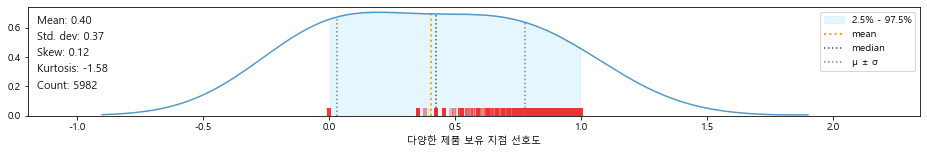

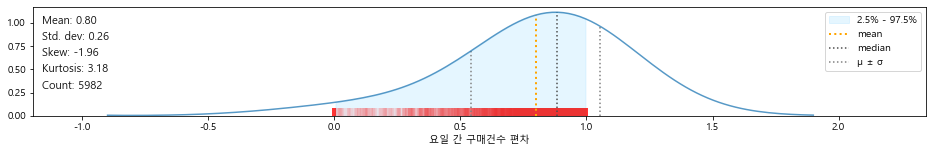

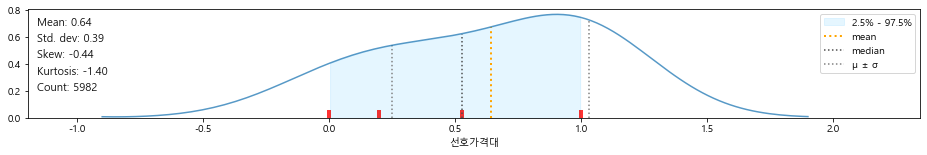

In [35]:
# 수치형 속성 파악

klib.dist_plot(features)

In [36]:
# 추가 scaling후 다시 csv 파일로 저장
features = features.to_csv('features_vif2.csv',index=False,encoding='cp949')

In [37]:
train = pd.read_csv('train_transactions.csv', encoding='cp949')
test = pd.read_csv('test_transactions.csv', encoding='cp949')
tr = pd.concat([train, test])

In [38]:
features = pd.read_csv('features_vif2.csv',encoding='cp949')

In [39]:
type(features)

pandas.core.frame.DataFrame

In [40]:
features

,cust_id,여름-구매비율,상시행사상품구매율,재구매의사,요일_변동계수,저가상품구매율,가공식품 구매건수,베스트셀러구매비율,구매주기 규칙성,패션_대비_남성상품_거래율,...,명품구매비율,목적지향적 물품 소비율,시즌 마감 방문비율,가을/겨울의류구매비율,남성 캐주얼 구매건수,요일별_구매추세,유아동구매비율,주방용품구매비율,구매지점다양성,스타킹구매건수
0,0,0.704013,0.832924,0.423125,0.280998,0.609132,0.309679,0.483734,0.655537,0.584982,...,-0.467531,-0.480795,0.149880,-0.470629,-0.531880,1.446069,-0.406455,-0.519049,1.212808,-0.357530
1,1,0.000000,0.000000,1.000000,0.773163,0.479327,0.000000,0.000000,0.000000,1.000000,...,-0.467531,-0.480795,1.114508,-0.470629,-0.531880,-0.199227,-0.406455,-0.519049,-0.736291,-0.357530
2,2,0.000000,0.000000,1.000000,0.729047,0.696553,0.000000,0.000000,0.000000,0.000000,...,-0.467531,-0.480795,-1.361003,-0.470629,1.927723,-0.371213,-0.406455,-0.519049,-0.736291,-0.357530
3,3,0.373920,0.000000,0.250231,0.039845,0.696553,0.692530,0.516036,0.616714,0.000000,...,-0.467531,-0.480795,0.369195,-0.470629,-0.531880,-0.332082,2.607439,-0.519049,-0.736291,2.796964
4,4,0.000000,0.000000,1.000000,0.773163,0.000000,0.000000,0.306114,0.000000,0.000000,...,-0.467531,2.303990,-0.160964,-0.470629,-0.531880,-0.264843,-0.406455,-0.519049,-0.736291,-0.357530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977,5977,0.576062,0.000000,0.693593,0.532525,0.000000,0.000000,0.127383,0.876672,0.967644,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.531880,0.487980,2.633891,-0.519049,1.212808,-0.357530
5978,5978,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.467531,-0.480795,0.587044,-0.470629,-0.531880,-0.199227,-0.406455,-0.519049,-0.736291,-0.357530
5979,5979,0.487674,0.000000,0.390221,0.936264,0.109358,0.309679,0.024639,0.589447,0.701430,...,1.507701,2.303990,1.041330,-0.470629,1.945910,2.194537,-0.406455,2.154823,-0.736291,-0.357530
5980,5980,0.387936,0.000000,0.740011,0.569697,0.000000,0.000000,0.640742,0.630552,0.000000,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.531880,-0.064367,-0.406455,-0.519049,-0.736291,-0.357530


In [41]:
train = pd.read_csv('train_transactions.csv', encoding='cp949')
test = pd.read_csv('test_transactions.csv', encoding='cp949')
train_id = train['cust_id']
test_id = test['cust_id']

X_train = pd.DataFrame({'cust_id': np.sort(train['cust_id'].unique())}).merge(features)
X_train.to_csv('X_train_vif.csv', index=False, encoding='cp949')

X_test = pd.DataFrame({'cust_id': np.sort(test['cust_id'].unique())}).merge(features)
X_test.to_csv('X_test_vif.csv', index=False, encoding='cp949')

In [43]:
X_train

,cust_id,여름-구매비율,상시행사상품구매율,재구매의사,요일_변동계수,저가상품구매율,가공식품 구매건수,베스트셀러구매비율,구매주기 규칙성,패션_대비_남성상품_거래율,...,명품구매비율,목적지향적 물품 소비율,시즌 마감 방문비율,가을/겨울의류구매비율,남성 캐주얼 구매건수,요일별_구매추세,유아동구매비율,주방용품구매비율,구매지점다양성,스타킹구매건수
0,0,0.704013,0.832924,0.423125,0.280998,0.609132,0.309679,0.483734,0.655537,0.584982,...,-0.467531,-0.480795,0.149880,-0.470629,-0.531880,1.446069,-0.406455,-0.519049,1.212808,-0.357530
1,1,0.000000,0.000000,1.000000,0.773163,0.479327,0.000000,0.000000,0.000000,1.000000,...,-0.467531,-0.480795,1.114508,-0.470629,-0.531880,-0.199227,-0.406455,-0.519049,-0.736291,-0.357530
2,2,0.000000,0.000000,1.000000,0.729047,0.696553,0.000000,0.000000,0.000000,0.000000,...,-0.467531,-0.480795,-1.361003,-0.470629,1.927723,-0.371213,-0.406455,-0.519049,-0.736291,-0.357530
3,3,0.373920,0.000000,0.250231,0.039845,0.696553,0.692530,0.516036,0.616714,0.000000,...,-0.467531,-0.480795,0.369195,-0.470629,-0.531880,-0.332082,2.607439,-0.519049,-0.736291,2.796964
4,4,0.000000,0.000000,1.000000,0.773163,0.000000,0.000000,0.306114,0.000000,0.000000,...,-0.467531,2.303990,-0.160964,-0.470629,-0.531880,-0.264843,-0.406455,-0.519049,-0.736291,-0.357530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-0.467531,-0.480795,1.514105,-0.470629,-0.531880,0.079291,-0.406455,-0.519049,-0.736291,-0.357530
3496,3496,0.201923,0.000000,0.598814,0.365257,0.343072,0.000000,0.508943,0.925630,0.598897,...,-0.467531,-0.480795,-1.361003,2.186856,-0.531880,0.054576,-0.406455,-0.519049,-0.736291,-0.357530
3497,3497,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.531880,-0.162484,-0.406455,2.189823,-0.736291,-0.357530
3498,3498,0.000000,0.000000,1.000000,0.729047,0.000000,0.000000,1.000000,0.000000,0.000000,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.531880,-0.162484,-0.406455,-0.519049,-0.736291,-0.357530


In [44]:
X_test

,cust_id,여름-구매비율,상시행사상품구매율,재구매의사,요일_변동계수,저가상품구매율,가공식품 구매건수,베스트셀러구매비율,구매주기 규칙성,패션_대비_남성상품_거래율,...,명품구매비율,목적지향적 물품 소비율,시즌 마감 방문비율,가을/겨울의류구매비율,남성 캐주얼 구매건수,요일별_구매추세,유아동구매비율,주방용품구매비율,구매지점다양성,스타킹구매건수
0,3500,0.143020,0.000000,0.385223,0.684955,0.314972,0.000000,0.189761,0.815026,0.879162,...,-0.467531,-0.480795,-0.546926,-0.470629,-0.53188,0.659137,-0.406455,-0.519049,1.212808,-0.357530
1,3501,0.664370,0.000000,0.795768,0.000000,0.684228,0.000000,0.458691,0.271738,0.534889,...,1.055200,1.145881,0.614208,2.186856,-0.53188,2.194537,-0.406455,-0.519049,-0.736291,2.796964
2,3502,0.573293,0.446211,0.249795,0.193976,0.769417,1.000000,0.702763,0.186333,0.000000,...,-0.467531,-0.480795,1.831427,-0.470629,-0.53188,-2.377733,0.915644,0.586934,-0.736291,2.796964
3,3503,0.254228,0.000000,0.642857,0.790821,0.154815,0.000000,0.274142,1.000000,0.000000,...,-0.467531,2.303990,0.587044,-0.470629,-0.53188,-0.471220,-0.406455,2.189823,-0.736291,-0.357530
4,3504,0.000000,0.000000,0.526293,0.800346,0.696553,0.309679,0.728370,0.235679,0.000000,...,-0.467531,-0.480795,1.514105,-0.470629,-0.53188,-0.162484,-0.406455,2.189823,-0.736291,-0.357530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,5977,0.576062,0.000000,0.693593,0.532525,0.000000,0.000000,0.127383,0.876672,0.967644,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.53188,0.487980,2.633891,-0.519049,1.212808,-0.357530
2478,5978,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.467531,-0.480795,0.587044,-0.470629,-0.53188,-0.199227,-0.406455,-0.519049,-0.736291,-0.357530
2479,5979,0.487674,0.000000,0.390221,0.936264,0.109358,0.309679,0.024639,0.589447,0.701430,...,1.507701,2.303990,1.041330,-0.470629,1.94591,2.194537,-0.406455,2.154823,-0.736291,-0.357530
2480,5980,0.387936,0.000000,0.740011,0.569697,0.000000,0.000000,0.640742,0.630552,0.000000,...,-0.467531,-0.480795,-1.361003,-0.470629,-0.53188,-0.064367,-0.406455,-0.519049,-0.736291,-0.357530
